In [4]:
%pip install turingquant
%pip install scipy

  Using cached turingquant-0.2.2-py3-none-any.whl (15 kB)
  Using cached pandas-2.0.2-cp311-cp311-macosx_11_0_arm64.whl (10.7 MB)
  Using cached pandas_datareader-0.10.0-py3-none-any.whl (109 kB)
  Using cached matplotlib-3.7.1-cp311-cp311-macosx_11_0_arm64.whl (7.3 MB)
  Using cached alpha_vantage-2.3.1-py3-none-any.whl (31 kB)
  Using cached bs4-0.0.1.tar.gz (1.1 kB)
  Preparing metadata (setup.py) ... done
  Using cached plotly-5.14.1-py2.py3-none-any.whl (15.3 MB)
  Using cached yfinance-0.2.18-py2.py3-none-any.whl (60 kB)
  Using cached aiohttp-3.8.4-cp311-cp311-macosx_11_0_arm64.whl (332 kB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached beautifulsoup4-4.12.2-py3-none-any.whl (142 kB)
  Using cached contourpy-1.0.7-cp311-cp311-macosx_11_0_arm64.whl (229 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.39.4-py3-none-any.whl (1.0 MB)
  Using cached kiwisolver-1.4.4-cp311-cp311-macosx_11_0_arm64.whl (63 kB)
  Using cached 

In [23]:
from turingquant.metrics import returns
from turingquant.metrics import cumulative_returns
from turingquant.metrics import cagr
from turingquant.metrics import mar_ratio
import yfinance as yf

In [6]:
%pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Lista de Funções para Estudar

* [returns]()
* cumulative_returns 
* [cagr](https://www.suno.com.br/artigos/cagr/) 
* [mar_ratio](https://www.investopedia.com/terms/m/mar-ratio.asp)

Para cada uma das funções:
1. Estudar conceitos por trás
2. Testar função com dados da Yahoo Finance
3. Explicar resultados e fórmulas utilizadas

In [7]:
df = yf.download(["ITUB3.SA"], start='2015-01-01')

[*********************100%***********************]  1 of 1 completed


## Função _returns_

Calcula a variação percentual de um ativo, dia a dia. Abaixo, exemplos de sua utilização.

<Axes: xlabel='Adj Close', ylabel='Count'>

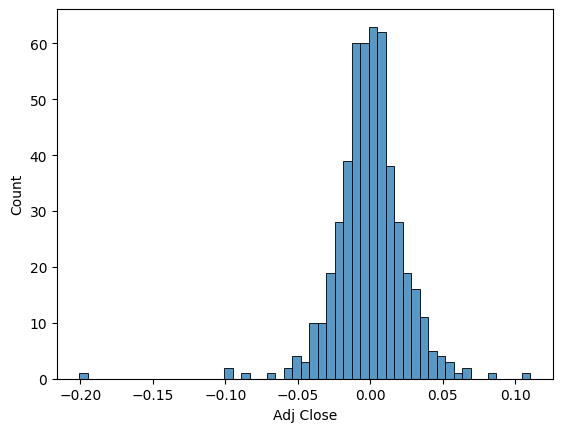

In [8]:
# get just the adjusted close price of days 01/01/2020 and 01/01/2022
# df['Adj Close'].loc['2020-01-01':'2022-01-01']
# get just the initial and final price
import seaborn as sns
data = returns(df['Adj Close'].loc['2020-01-01':'2022-01-01'])
sns.histplot(data)



In [9]:
returns(df['Adj Close'].loc['2020-01-01':'2022-01-01'])

Date
2020-01-02         NaN
2020-01-03   -0.008282
2020-01-06   -0.010207
2020-01-07   -0.019375
2020-01-08   -0.010198
                ...   
2021-12-23    0.004168
2021-12-27    0.009341
2021-12-28   -0.003599
2021-12-29   -0.003096
2021-12-30   -0.011905
Name: Adj Close, Length: 495, dtype: float64

<Axes: xlabel='Adj Close', ylabel='Count'>

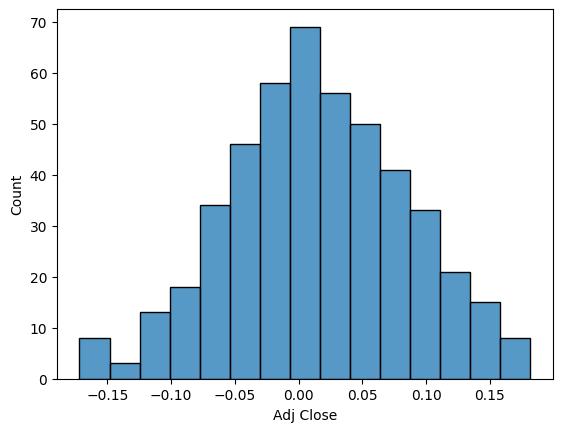

In [10]:
monthly_data = df['Adj Close'].loc['2018-01-01':'2020-01-01'].pct_change(periods=21)
sns.histplot(monthly_data)

In [11]:
df['Adj Close'].loc['2018-01-01':'2022-01-01'].pct_change(periods=21)

Date
2018-01-02         NaN
2018-01-03         NaN
2018-01-04         NaN
2018-01-05         NaN
2018-01-08         NaN
                ...   
2021-12-23   -0.066008
2021-12-27   -0.065430
2021-12-28   -0.047297
2021-12-29   -0.046500
2021-12-30   -0.049414
Name: Adj Close, Length: 989, dtype: float64

Podemos ver que o retorno do ativo ITUB3.SA foi de -37,43% nos anos de 2020 - 2022. Agora podemos utilizar esta metrica para calcular outros indicadores quantitativos

## Função _cumulative\_returns_

**Representa o retorno cumulativo de determinado ativo (ou portfolio) em um dado período.** <br><br>

O retorno cumulativo é bastante útil para avaliar o desempenho geral de um investimento no horizonte de tempo determinado, sendo possível observar também as flutuações na cotação desse ativo ou portfolio<br><br>

Sua fórmula é dada por: 
$Ret_{acum} = (1 + Ret_{t_{1}}) * (1 + Ret_{t_{2}}) * ... * (1 + Ret_{t_{n}})$





<Axes: xlabel='Adj Close', ylabel='Count'>

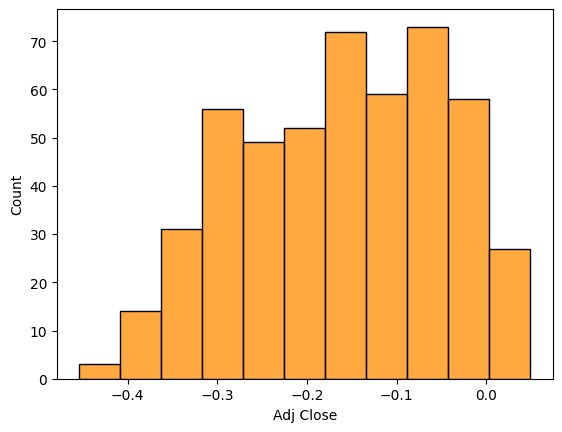

In [21]:
# retorno logaritmo

data_log = cumulative_returns(returns(df['Adj Close'].loc['2020-01-01':'2022-01-01']), 'log')   
sns.histplot(data_log, color = "darkorange")

<Axes: xlabel='Adj Close', ylabel='Count'>

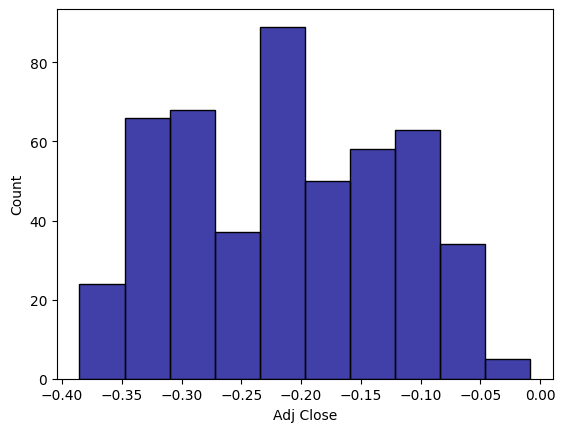

In [22]:
# retorno simples 

data_simp = cumulative_returns(returns(df['Adj Close'].loc['2020-01-01':'2022-01-01']), 'simp')   
sns.histplot(data_simp, color = "darkblue")

## Função _cagr_

**CAGR é a sigla para Compound Annual Growth Rate, ou seja, Taxa de Crescimento Anual Composta** <br><br>

Geralmente apresentada em termos percentuais, nada mais é do que a taxa de crescimento anual que, se aplicada de forma constante ao longo do período considerado, resultaria no crescimento total observado na cotação de um ativo (ou portfolio). É bastante útil para comparar a performance de investimentos em diferentes horizontes de tempo, pois utiliza a mesma base de tempo (anual). Cabe ressaltar que o CAGR não mostra explicitamente a variação existente na cotação (o quanto flutuou o preço do ativo). Um CAGR de 10%, por exemplo, pode "esconder" momentos de retornos negativos e momentos de retorno muito positivos

In [33]:
# CAGR anual - time_scale de 252 dias
# 2020 a 2021

cagr_anual_20_21 = cagr(returns(df['Adj Close'].loc['2020-01-01':'2021-01-01']), time_scale = 252)
print(cagr_anual_20_21)

-0.12119868040964366


In [34]:
# CAGR anual - time_scale de 252 dias
# 2021 a 2022

cagr_anual_21_22 = cagr(returns(df['Adj Close'].loc['2021-01-01':'2022-01-01']), time_scale = 252)
print(cagr_anual_21_22)

-0.2822477819612216


## Função _mar\_ratio_

**MAR Ratio é a sigla para Minimum Acceptable Return Ratio, ou seja, Taxa de Retorno Mínimo Aceitável** <br><br>

O seu cálculo leva em consideração duas coisas: 1) CAGR (explicado acima) e 2) Drawdown <br>
O Drawdown representa o quanto a cotação de um ativo (ou portfolio) caiu do o seu pico anteriormente alcançado até seu vale subsequente. O Máximo Drawdown representa a maior queda (em termos percentuais) de um pico até seu vale subsequente, mostrando o impacto negativo que um investidor teria tido se tivesse comprado o ativo no pior pico possível e vendido no ponto mais baixo do Drawdown. <br><br>

Finalmente, o MAR ratio pode ser expresso pela razão entre o CAGR e o Máximo Drawdown observados no período. É, portanto, uma medida de avaliação da relação risco-retorno, funcionando como uma métrica para ajustar o retorno de um investimento ao risco a que ele está exposto (tomando como base seu desempenho histórico).

In [15]:
# INSIRA EXEMPLO DE UTILIZAÇÃO EM CÓDIGO

# Como essas funções podem ser utilizadas para montar um portfolio de investimento?